# Predicting Titanic Surviors
### Option 3 - Nolan Pestano

In this dataset, we will use a Neural Network to seek patterns in survival of the Titanic, and build a Neural Network to predict if one was able to survive.  


#### Note, this data set came pre split into testing and training data sets. We combine them in this data set to make it easier for data cleanup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

Lets read in our data and take a peek at it.

In [2]:
df = pd.read_csv("titanic.csv",index_col=0)


# move the survived column to the end, it makes sense to me for it to be at teh end
# https://stackoverflow.com/questions/25649429/how-to-swap-two-dataframe-columns
columns_titles = ['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked','Survived']
df=df.reindex(columns=columns_titles)

df.columns = map(str.lower, df.columns)

df.head(10)


,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
PassengerId,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0
7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0
9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,1


This data set provides us with some ~900 passangers aboard the Titanic when it sunk, alongside some corresponding information from them.

From Kaggle:
<details> <summary>All data points and their meaning</summary>
```
    PassengerId is the unique id of the row and it doesn't have any effect on target

    Survived is the target variable we are trying to predict (0 or 1):

        1 = Survived
        0 = Not Survived

    Pclass (Passenger Class) is the socio-economic status of the passenger and it is a categorical ordinal feature which has 3 unique values (1, 2 or 3):

        1 = Upper Class
        2 = Middle Class
        3 = Lower Class

    Name, Sex and Age are self-explanatory

    SibSp is the total number of the passengers' siblings and spouse

    Parch is the total number of the passengers' parents and children

    Ticket is the ticket number of the passenger

    Fare is the passenger fare

    Cabin is the cabin number of the passenger

    Embarked is port of embarkation and it is a categorical feature which has 3 unique values (C, Q or S):
        C = Cherbourg
        Q = Queenstown
        S = Southampton
```
</details>

##### There is a lot of missing info pertaining to certain passangers. We will not only have to acknowledge that, but find a solution.

In [3]:
for col in df.columns:
    print(col,df[col].isnull().sum())

pclass 0
name 0
sex 0
age 177
sibsp 0
parch 0
ticket 0
fare 0
cabin 687
embarked 2
survived 0


So we don't know if 177 passangers's ages, we don't know where 687 roomed at, and we don't know where two embarked.

Let's tackle the age first

In [4]:
df[df["age"].isnull()]


,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
PassengerId,,,,,,,,,,,
6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0
18,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,1
20,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,1
27,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,0
29,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,1
...,...,...,...,...,...,...,...,...,...,...,...
860,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C,0
864,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,0
869,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S,0


it would be foolish to just fill in with the median age, as there is a lot of factors that affect age. that is, there is a logical conclusion that those paying higher fares would likely be higher class and thus higher age

In [5]:
# get median age from each class
for i in range(1,4): #1, 2 ,3 is there an easier way to do this loooool
    print(f"Median age for class {i} is {df[df['pclass']==i]['age'].median()}")
    
# if the passanger is missing age, fill it with the median age of their class
def apply_age(row):
    if (pd.isnull(row["age"])):
        age = df[df["pclass"]==row["pclass"]]["age"].median()
        return age
    else:
        return row["age"]

df["age"] = df.apply(apply_age,axis=1)
print(f"remaining after applying median: {df['age'].isnull().sum()}")
(df["age"].head(10))

Median age for class 1 is 37.0
Median age for class 2 is 29.0
Median age for class 3 is 24.0
remaining after applying median: 0


PassengerId
1     22.0
2     38.0
3     26.0
4     35.0
5     35.0
6     24.0
7     54.0
8      2.0
9     27.0
10    14.0
Name: age, dtype: float64

There's probably a more accurate way to deal with those, but I feel like that is a fair compromise. 

Let's do the other relatively easy one, the embarked

In [6]:
df[df["embarked"].isnull()]

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
PassengerId,,,,,,,,,,,
62,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,1
830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,1


A quick google search tells us that the two fo them were firends, and embarked at Southampton. Let's jsut add that manually.
https://www.encyclopedia-titanica.org/titanic-survivor/amelia-icard.html

In [7]:
def change_embark(row):
    if pd.isnull(row['embarked']):
        return "S"
    else:
        return row['embarked']
    
df["embarked"] = df.apply(change_embark,axis=1)
df["embarked"].isnull().sum()

0

Now the only row with reamining empty data is the cabin column

This is a rather difficult piece of data to assign, and honestly, I'm not sure how to tackle it.
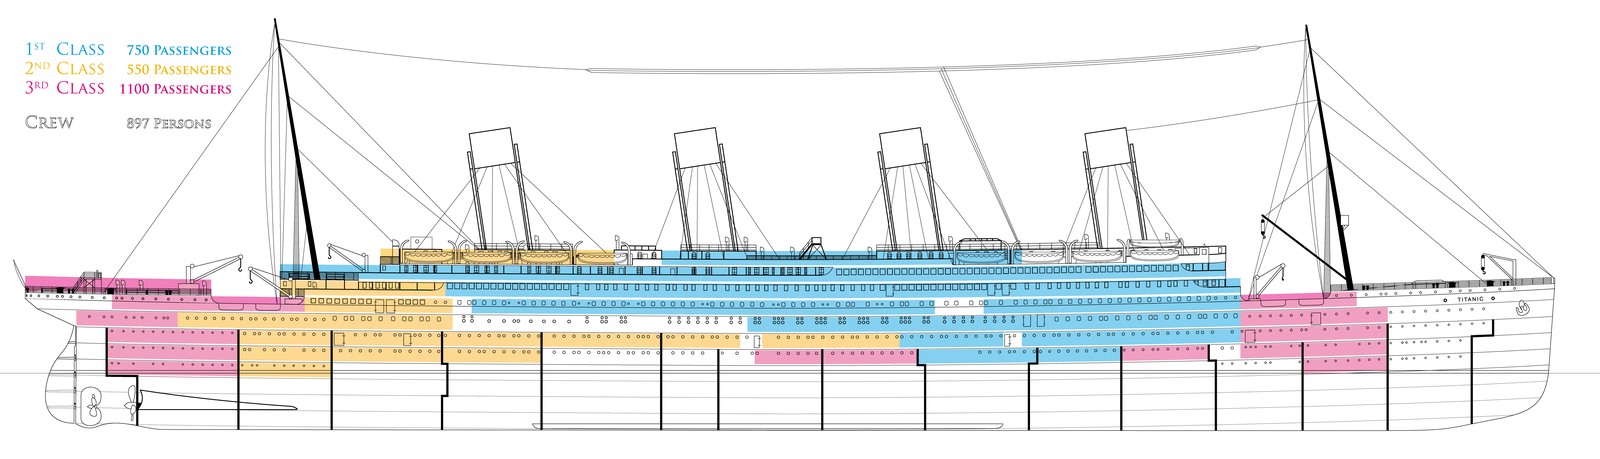 

I can imagine that the lower classes have a lower cabin? But truly, there's a lot of missing data, so even if I had an epiphany, I feel like the 600 missing data points wouldn't allowe me to make a good decision.

Let's just drop all the irrelevant rows. 

In [8]:
# drop uneeded columns
print(df.columns)
df = df.drop(columns=["name", "ticket", "cabin"])
df.head()

Index(['pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'cabin', 'embarked', 'survived'],
      dtype='object')


,pclass,sex,age,sibsp,parch,fare,embarked,survived
PassengerId,,,,,,,,
1,3,male,22.0,1,0,7.2500,S,0
2,1,female,38.0,1,0,71.2833,C,1
3,3,female,26.0,0,0,7.9250,S,1
4,1,female,35.0,1,0,53.1000,S,1
5,3,male,35.0,0,0,8.0500,S,0


We still have a little bit of data to clean up, namely in categorial.

We want to make :
    sex
    embarked

into encoded data.

Both are relatviely easy, we'll say 0 male, 1 female.

For embarked, we'll say 
    S (southampton) : 0
    C (Chersbourg) : 1
    Q (queenstown) : 2


In [9]:
# change sex into 0 male 1 female

gender_map = {
    "male" : 0,
    "female" : 1
}
embarked_map = {
    "S":0,
    "C":1,
    "Q":2
}

df.replace({"sex": gender_map}, inplace=True)
df.replace({"embarked": embarked_map}, inplace=True)
df.head()




,pclass,sex,age,sibsp,parch,fare,embarked,survived
PassengerId,,,,,,,,
1,3,0,22.0,1,0,7.2500,0,0
2,1,1,38.0,1,0,71.2833,1,1
3,3,1,26.0,0,0,7.9250,0,1
4,1,1,35.0,1,0,53.1000,0,1
5,3,0,35.0,0,0,8.0500,0,0


### Everything is numerical now!

Lets look at some graphs 

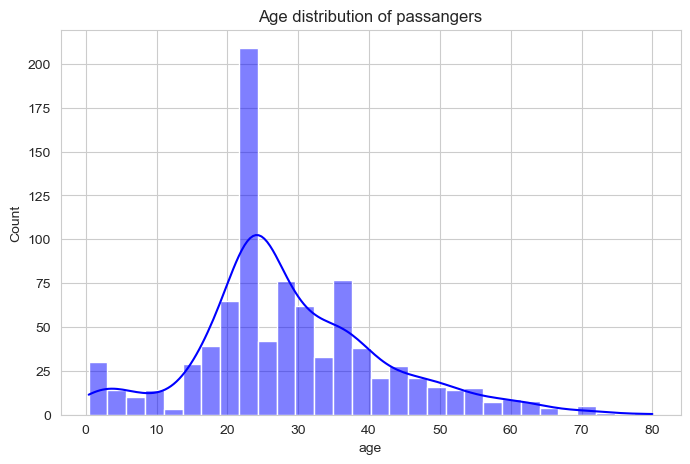

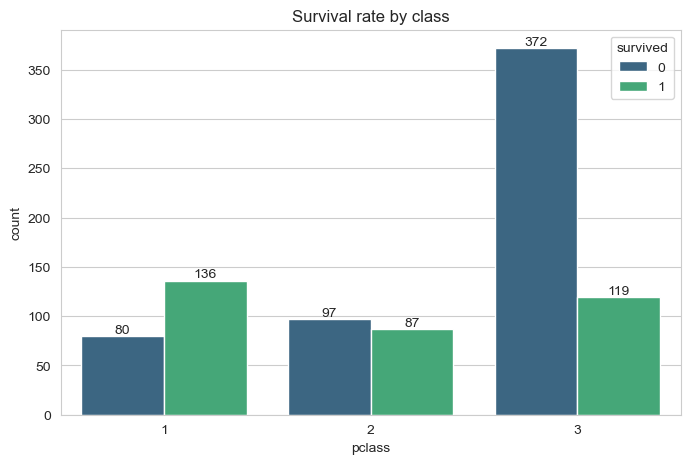

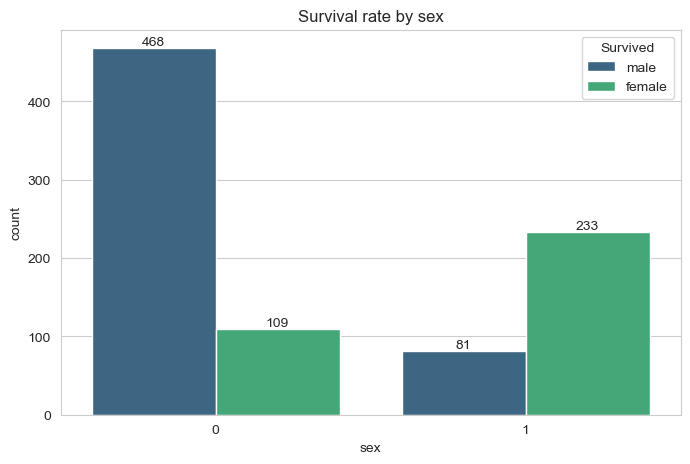

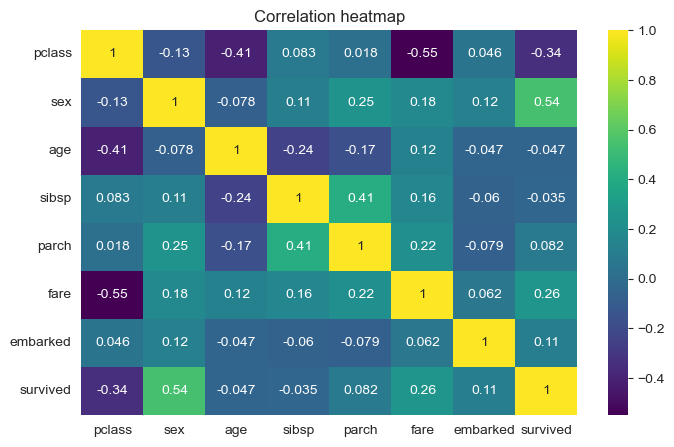

In [10]:
# graph to show the distribution of ages
plt.figure(figsize=(8,5))
sns.histplot(df["age"],bins=30,kde=True, color="blue")
plt.title("Age distribution of passangers")
plt.show()

# class vs survived
plt.figure(figsize=(8,5))
g = sns.countplot(x="pclass",data=df,hue="survived", palette="viridis")
g.bar_label(g.containers[0])
g.bar_label(g.containers[1])
plt.title("Survival rate by class")
plt.show()

# survival rate by sex
plt.figure(figsize=(8, 5))
g = sns.countplot(x="sex", data=df, hue="survived", palette="viridis")
g.bar_label(g.containers[0])
g.bar_label(g.containers[1])
legend_labels = ["male", "female"]
plt.legend(title="Survived", labels=legend_labels)
plt.title("Survival rate by sex")
plt.show()

# finally a nice corralation plot
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(),annot=True,cmap="viridis")
plt.title("Correlation heatmap")
plt.show()

## Part Two
*normalization, and training a machine learning model*
***

Our first step is to scale our data so no feature's range is too biased. (also splitting into features and predicted :p)

We do that because a lot of our algos are sensitive to ranges, and thus we don't want anything getting out of hand.

In [11]:
X = df.drop(columns=["survived"])
y = df["survived"]

from sklearn.preprocessing import StandardScaler

myscaler = StandardScaler()
X = myscaler.fit_transform(X)
 
# our data is now in the form of numpy arrays, 
# not the most friendly for human eyes but for the computer it's perfect
print(X[0])

[ 0.82737724 -0.73769513 -0.53383369  0.43279337 -0.47367361 -0.50244517
 -0.56883712]




Now we can split our data into testing, cross validationand training data. This will allow us to have some information to train, refine, and ultimately test our model. We will use a 60/20/20 split respecitvely

In [12]:
# train, cv, test split
from sklearn.model_selection import train_test_split

# 60% into training, 40% into a temporary set that will be split into validation and test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42) 

# this splits the 40% into halves for validation and test (so 20% of the original data each)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training set: {X_train.shape[0]}")
print(f"Validation set: {X_val.shape[0]}")
print(f"Test set: {X_test.shape[0]}")

Training set: 534
Validation set: 178
Test set: 179


Now with our data formatted and in the columsn we want, we can start training our model. We will use logistic regression because we want to understand a prediction on a binary element.

In [13]:
# we'll use a keras neural network for this
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# init the model
prediction_model = Sequential()

# layers
prediction_model.add(Dense(16, activation="relu", input_shape=(7,))) # input
prediction_model.add(Dense(8, activation="relu"))
prediction_model.add(Dense(4, activation="relu")) # relu is generally applicable to hidden layers
prediction_model.add(Dense(1, activation="sigmoid")) #sigmoid for binary classification

prediction_model.compile(optimizer="adam", loss="mse", metrics=["accuracy"])

prediction_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                128       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 305 (1.19 KB)
Trainable params: 305 (1.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/100
17/17 [==============================] - 0s 6ms/step - loss: 0.2325 - accuracy: 0.6236 - val_loss: 0.2301 - val_accuracy: 0.6348
Epoch 2/100
17/17 [==============================] - 0s 2ms/step - loss: 0.2246 - accuracy: 0.6236 - val_loss: 0.2230 - val_accuracy: 0.6348
Epoch 3/100
17/17 [==============================] - 0s 2ms/step - loss: 0.2165 - accuracy: 0.6236 - val_loss: 0.2158 - val_accuracy: 0.6348
Epoch 4/100
17/17 [==============================] - 0s 2ms/step - loss: 0.2086 - accuracy: 0.6236 - val_loss: 0.2084 - val_accuracy: 0.6348
Epoch 5/100
17/17 [==============================] - 0s 1ms/step - loss: 0.2003 - accuracy: 0.6236 - val_loss: 0.2018 - val_accuracy: 0.6348
Epoch 6/100
17/17 [==============================] - 0s 1ms/step - loss: 0.1930 - accuracy: 0.6236 - val_loss: 0.1953 - val_accuracy: 0.6348
Epoch 7/100
17/17 [==============================] - 0s 2ms/step - loss: 0.1866 - accuracy: 0.6236 - val_loss: 0.1907 - val_accuracy: 0.6348
Epoch 8/100
1

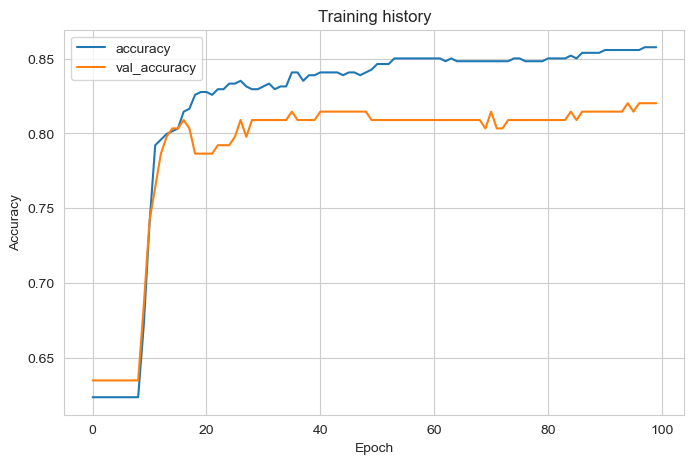

In [14]:
# train the model
history = prediction_model.fit(X_train, y_train, validation_data=(X_val, y_val),
                               epochs=100, batch_size=32, verbose=1)

# plot the training history
plt.figure(figsize=(8,5))
plt.plot(history.history["accuracy"], label="accuracy") # training accuracy
plt.plot(history.history["val_accuracy"], label="val_accuracy") # cross validation accuracy
plt.title("Training history")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# evaluate the model
loss, accuracy = prediction_model.evaluate(X_test, y_test)
print(f"Test loss: {loss}")
print(f"Test accuracy: {accuracy}")


6/6 [==============================] - 0s 510us/step


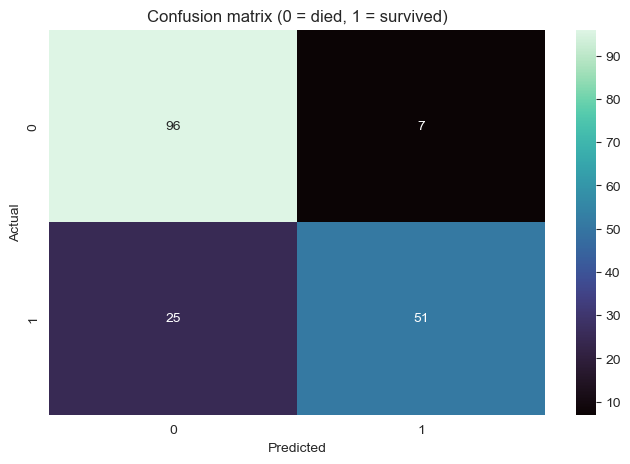

In [15]:
# our first model is complete, we can now use it to make predictions
# we'll use the test set for this

from sklearn.metrics import classification_report, confusion_matrix

predictions = prediction_model.predict(X_test)
# print(predictions[:10]) # these are the probabilities of survival, we can roudn to 0 or 1. .5% is a fair threshold
predictions = np.round(predictions).astype(int) 


cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True, cmap="mako")
plt.title("Confusion matrix (0 = died, 1 = survived)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [16]:
print(classification_report(y_test, predictions))
print(f"Accuracy: {accuracy}")


              precision    recall  f1-score   support

           0       0.79      0.93      0.86       103
           1       0.88      0.67      0.76        76

    accuracy                           0.82       179
   macro avg       0.84      0.80      0.81       179
weighted avg       0.83      0.82      0.82       179

Accuracy: 0.8212290406227112


### On our first iteration, our model finds an accuracy of about 80%.

let's see if we can make it more accurate through reguralization, and more layers

Epoch 1/100
17/17 [==============================] - 0s 6ms/step - loss: 0.7410 - accuracy: 0.5824 - val_loss: 0.7113 - val_accuracy: 0.6517
Epoch 2/100
17/17 [==============================] - 0s 2ms/step - loss: 0.6846 - accuracy: 0.7060 - val_loss: 0.6584 - val_accuracy: 0.6966
Epoch 3/100
17/17 [==============================] - 0s 2ms/step - loss: 0.6330 - accuracy: 0.7640 - val_loss: 0.6095 - val_accuracy: 0.7640
Epoch 4/100
17/17 [==============================] - 0s 2ms/step - loss: 0.5859 - accuracy: 0.7996 - val_loss: 0.5653 - val_accuracy: 0.7584
Epoch 5/100
17/17 [==============================] - 0s 2ms/step - loss: 0.5428 - accuracy: 0.8109 - val_loss: 0.5253 - val_accuracy: 0.7697
Epoch 6/100
17/17 [==============================] - 0s 1ms/step - loss: 0.5035 - accuracy: 0.7996 - val_loss: 0.4897 - val_accuracy: 0.7809
Epoch 7/100
17/17 [==============================] - 0s 1ms/step - loss: 0.4683 - accuracy: 0.8090 - val_loss: 0.4577 - val_accuracy: 0.7978
Epoch 8/100
1

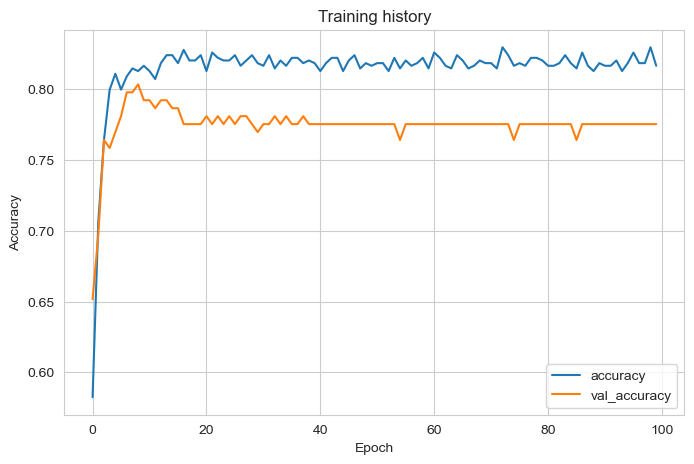

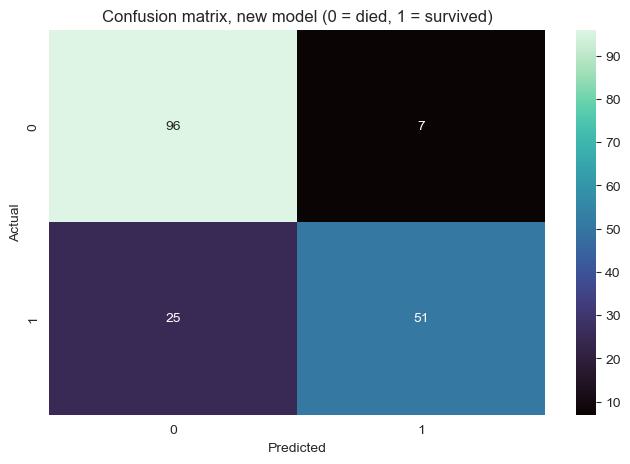

              precision    recall  f1-score   support

           0       0.79      0.93      0.86       103
           1       0.88      0.67      0.76        76

    accuracy                           0.82       179
   macro avg       0.84      0.80      0.81       179
weighted avg       0.83      0.82      0.82       179

Accuracy: 0.8156424760818481


In [17]:
# new model, more layers
from tensorflow.keras.regularizers import l2

new_model = Sequential()

new_model.add(Dense(32, activation="relu", input_shape=(7,), kernel_regularizer=l2(0.01))) # input
new_model.add(Dense(16, activation="relu", kernel_regularizer=l2(0.01)))
new_model.add(Dense(8, activation="relu", kernel_regularizer=l2(0.01)))
new_model.add(Dense(4, activation="relu", kernel_regularizer=l2(0.01)))
new_model.add(Dense(1, activation="sigmoid", kernel_regularizer=l2(0.01)))

new_model.compile(optimizer="adam", loss="mse", metrics=["accuracy"])

new_history =  new_model.fit(X_train, y_train, validation_data=(X_val, y_val),
                               epochs=100, batch_size=32, verbose=1)

# plot the training history
plt.figure(figsize=(8,5))
plt.plot(new_history.history["accuracy"], label="accuracy") # training accuracy
plt.plot(new_history.history["val_accuracy"], label="val_accuracy") # cross validation accuracy
plt.title("Training history")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# evaluate the model
loss, accuracy = new_model.evaluate(X_test, y_test)
print(f"Test loss: {loss}")

new_p = new_model.predict(X_test)
# print(predictions[:10]) # these are the probabilities of survival, we can roudn to 0 or 1. .5% is a fair threshold
new_p = np.round(predictions).astype(int) 


cm = confusion_matrix(y_test, new_p)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True, cmap="mako")
plt.title("Confusion matrix, new model (0 = died, 1 = survived)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(classification_report(y_test, new_p))
print(f"Accuracy: {accuracy}")

### We find an accuracy of about 82%

Honestly, the accuracy difference isn't that staggering. We can probably just conclude that's from the relatively low amount of data for our model to train on.

# Part 3
*model interpertation*
***

Now that we have our model definied, it would be interested to see what factors affected someone's surviability the most.

I have learned of [SHAP](https://shap.readthedocs.io/en/latest/) which is a killer library that can allow us to interpert our model and what features matter the most.

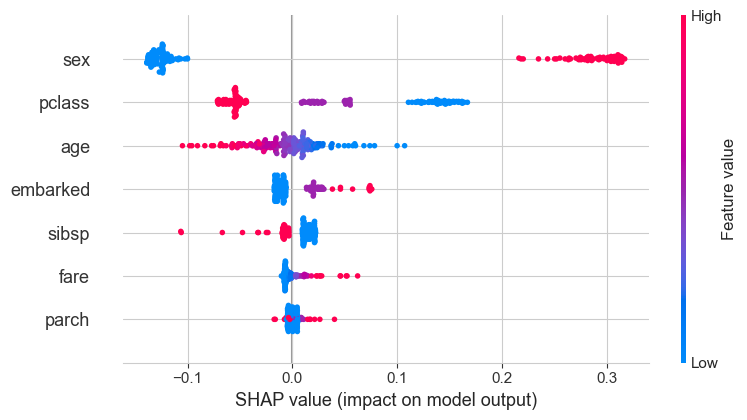

In [ ]:
import shap

# init shap's explainer
explainer = shap.Explainer(new_model, X_train)

# shap does the calculations, hand wavey magic
shap_values = explainer(X_test)

# summarize
# change the feature names to the column names
shap.summary_plot(shap_values, X_test, feature_names=df.columns)
# incredible


SHAP shows us that the impact on the model output. SHapley Additive exPlanations is a silly complex game theory idea that I don't fully understand, but in short, SHAP assigns a value to each feature that represents its contribution to the model's output. 

We can see that the most predictive feature of survival is the sex of a passanger.  This makes sense because of the phrase repeated a lot (at least in the christopher Nolan movie) "Women and children first." Furthermore the class of the passanger also heavily impacted the survival. This makes sense as the wealthy would likely be in higher classes, and thus be on boats faster.

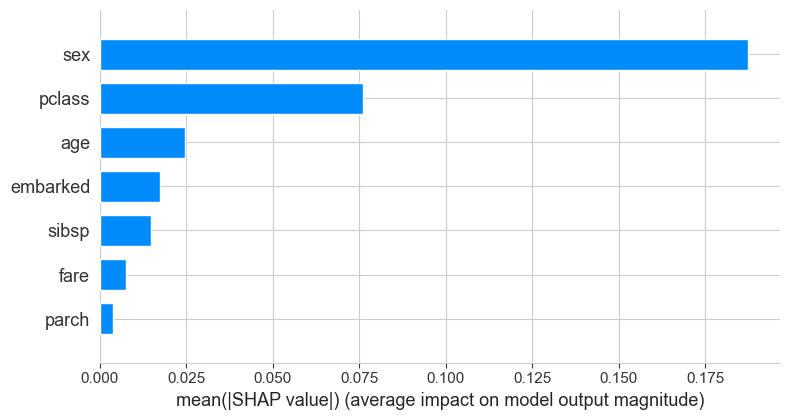

In [34]:
shap.summary_plot(shap_values, X_test, feature_names=df.columns, plot_type="bar")

Interesting enough though, parents/children present on board had the least effect on survival. Maybe it's because having parents or children on board didn’t significantly influence access to lifeboats or other survival resources, which were more likely allocated based on class, gender, and age rather than family ties. Although I would've guessed having family members nearby would encourage survival? Alas the numbers show different. 

### Part 4
*conclusions*
***

After training a sequential keras model, we were able to create a model with a 80%~ accuracy, which I believe is fair with the data size. Furthermore, we were able to interpert the data and see using SHAP that sex, class, and age were the most predictive featuers on if a passanger was surviving or not.

This data set was quite a lot of fun to tackle, and I really enjoyed the preprocessings, namely I really had a great epiphany with the median age by class. The visualizations are always my favorite part too :)

If I were too improve this model, I would *really* want to understand the cabin column. I can highly imagine the cabin made a huge difference in survival, but I couldn't think of a way to fill in the column as there was simply just too much missing. This was definitely the part that I spend the most time dwelling over.